#A Statistical Approach to Skiing
###Cole Hanlon, 2021
***
<div style="text-align:center">
    <img src="images/FWT_logoresize.jpg" />
</div>
***

The Freeride World Tour (FWT) is a series of skiing events that take place in locations around the world during the winter season. Athletes competing are from all around the world. During each event a unique mountain face is selected, which is not part of a defined ski area. Each event includes both men and womens, who ski and snowboard. However, to reduce complexity we will focus on men's skiing. The terrain is often untracked and athletes must study the terrain features to put together a 'line'. A 'line' consists of skiing open faces, jumping off features, dropping cliffs, and skiing technical terrain. 

First we must import all needed libraries for this analysis.

In [659]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d


Read in our data and remove extra columns.

In [660]:
df =  pd.read_csv('FWT_Data.csv')
df.drop('Unnamed: 10', axis=1, inplace=True)
df.drop('Unnamed: 11', axis=1, inplace=True)
df = df.set_index("skier")
df

,airs,spins,inverts,crashes,largest_spin,largest_invert,largest_magnitude,largest_landed,score
skier,,,,,,,,,
Mickael Bimboes,5,0,0,0,0,0,3,1,70.00
Drew Tabke,6,0,0,0,0,0,4,1,75.00
Andrew Pollard,5,0,0,1,0,0,2,0,42.00
Carl Eriksson,5,0,1,0,0,1,2,1,61.67
Yu Sasaki,4,1,0,0,1,0,4,1,78.33
Liam Peiffer,2,0,0,0,0,0,4,1,65.33
Yann Baudron,5,1,0,1,0,0,3,1,28.67
Reine Barkered,5,0,1,0,0,1,4,1,76.67
Markus Eder,7,2,1,0,1,1,4,1,86.67


##A Look at the Data:
As seen in the data frame, we have many different data features. These features includes, *skier, airs, spins, inverts, crashes, largest_spin, largest_invert, largest_magnitude, largest_landed,* and *score*. 

The meaning of each is explained below,

* Skier: This includes the name of the skier, to which the following columns and data belong
* Airs: Total number of times a skier jumps off something during the event
* Spins: Total number of times a skier performs a 360 degree spin while in the air
* Inverts: Total number of times a skier flips, either back or forward while in the air
* Crashes: Total number of times a skier crashes in the event
* Largest_Spin: Total number of spins in the skier's largest trick in the event
* Largest_Invert: Total number of flips in the skier's largest trick in the event
* Largest_Magnitude: A value in the range of 1-5, describing the distance travelled in air of the skier's largest trick
* Largest_Landed: True or false value determing if the skier landed their largest trick, 1=landed and 0=crashed
* Score:The final score the skier received from the judges

Unfortunately skiing does not have defined stats, unlike major sports such as basketball and baseball. These data features were selected based on judging criteria, as the analysis has a goal of determining if judging is unbiased and if there is a statistical approach to skiing. The decision behind collecting these data features, and scoring outline will be discussed in the next section. Looking back at our data, it is very clean, as this data is not made available by the FWT. The data was collected manually, by watching an event and recording data into Excel, then exporting into a CSV file, which is available. The event picked was in Hakuba, Japan in 2019. This was selected as it is the video/livestream replay that has the most views on the FWT YouTube channel, signalling that it was perhaps their most popular event to take place. This video can be found here; [LIVE WEBCAST Replay - Freeride World Tour Hakuba Japan 2019](https://www.youtube.com/watch?v=aXQnYTHspiE). It would only make an alaysis stronger to have record more events. However, it is very time consuming to watch an event. This results in a small dataset for this event and analysis. The only issue in this data is that two skier's were unable to participate and they must be removed from the dataset.

We must remove the two who did not participate, Wadeck Gorak and Leo Slemett.

In [661]:
df.drop("Wadeck Gorak", inplace=True)
df.drop("Leo Slemett", inplace=True)

##Judging and Scoring

When speaking to others, and observing FWT events it seems that judging and scoring is somewhat biased. It seems that well known skier's have an automatic higher score. This is something that is important to evaluate. The FWT has a [Judging Handbook](https://www.freerideworldtour.com/sites/default/files/2021_judging_handbook.pdf). Reading through this handbook confirms that there are 5 categories judges focus on when it comes to scoring. These categories are all supposed to equally impact a skier's score. The 5 categories are, *Line, Fluidity, Control, Air & Style,* and *Technique*. Judges seem to have a baseline score, then deduct and add points from performance in each of these categories. After each run, the FWT shows a graphic which shows judges thoughts on these five categories.

<div style="text-align:center">
    <img src="images/FWT_criteriaresize.jpg" />
</div>

As seen above, this skier should have points added to the baseline score for line and many points deducted from all other categories. The data features chose can all be used to evaluate each of these categories.

#Baseline Score

We should first determine what a baseline score would be. We should first calculate an average of scores.

In [662]:
avg_score = df['score'].mean()
avg_score

59.934000000000005

Knowing that crashes will most likely result in a deduction of points, and spins/inverts will result in additional scores. We should evaluate where no spins, inverts, or crashes take place.

In [663]:
straight_airs_df = pd.read_csv('FWT_Data.csv')
straight_airs_df.drop('Unnamed: 10', axis=1, inplace=True)
straight_airs_df.drop('Unnamed: 11', axis=1, inplace=True)
straight_airs_df = straight_airs_df.set_index("skier")
straight_airs_df.drop("Wadeck Gorak", inplace=True)
straight_airs_df.drop("Leo Slemett", inplace=True)

straight_airs_df.drop(straight_airs_df[straight_airs_df['spins'] > 0].index, inplace=True) #Remove spins
straight_airs_df.drop(straight_airs_df[straight_airs_df['inverts'] > 0].index, inplace=True) #Remove inverts
straight_airs_df.drop(straight_airs_df[straight_airs_df['crashes'] > 0].index, inplace=True) #Remove crashes

straight_airs_df

,airs,spins,inverts,crashes,largest_spin,largest_invert,largest_magnitude,largest_landed,score
skier,,,,,,,,,
Mickael Bimboes,5,0,0,0,0,0,3,1,70.00
Drew Tabke,6,0,0,0,0,0,4,1,75.00
Liam Peiffer,2,0,0,0,0,0,4,1,65.33
Aymar Navarro,4,0,0,0,0,0,5,1,73.00


From just a simple glance of this new data frame, we can see that all scores are actually very similary. The scores are in a much tighter range than the whole event. 

With a minimum score of,


In [664]:
straight_airs_df['score'].min()

65.33

A maximum score of,


In [665]:
straight_airs_df['score'].max()

75.0

This difference is relatively small, however, it seems it can be explained by the lack of airs resulting in the minimum score.

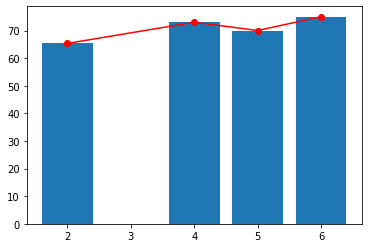

In [666]:
straight_airs_df.sort_values(by=['airs'], inplace=True)

plt.bar(straight_airs_df['airs'], straight_airs_df['score'])
plt.plot(straight_airs_df['airs'], straight_airs_df['score'], '-o', color='red')
plt.show()

We see above that the number o airs does play an impact in increasing score when no spins, inverts or crashes occur. The data we have is so small, that we see a dip where the number of airs is equal to 5. This is due to just having a single skier, and a single run for each of these data points. This could mean Mickael Bimboes, who did 5 airs, still had some other impacts in his run that reduced his score, but were not recorded in the data set. This is why a larger data set would be more beneficial. We should now figure out what the average score is for an average number of airs, with no other scoring impacts (no spins, inverts, or crashes).

In [667]:
baseline_airs = straight_airs_df['airs'].mean()
baseline_score = straight_airs_df['score'].mean()

print("Baseline Airs: ", baseline_airs)
print("Baseline Score: ", baseline_score)

Baseline Airs:  4.25
Baseline Score:  70.8325


We can now start working off a baseline score of 70.8325 points when a run has about 4 airs, and no spins, inverts, or crashes. This is further backed up as the scores of Aymar Navarro and Mickael Bimboes are very similar, with 4 and 5 airs respectively. The score of Aymar Navarro is above this baseline with only 4 airs is evidenced by his above average magnitude on his largest air. Whereas, Mickael Bimboes had an average magnitude, with slighlty more airs than average, and resulted in a lower score.

#Line

A 'line' as explained before is a skier's path down the mountain face. A skier will have to choose a 'line' that has multiple features in order to do airs, spins, and inverts. Therefore, we can evaluate a skier's line through their total number of airs, and their largest_magnitude. As we will be able to see how risky their 'line' selection is, and how exciting it is. Again, we will not want to evaluate any crashes. Inverts and spins should also not have an impact.

Working from a baseline of ~70 points for an average run of 4.25 airs, we should divide this value by the 5 categories, to understand the baseline points of each category.

In [668]:
category_baseline = baseline_score / 5
category_baseline

14.1665

We can now work based on expected values for a scoring system, where we multiply the category baseline to a calculated weight based on performance in the category. The weight can be both positive and negative, to add and subtract points, however, can only add a maximum of 6 points, to reach the maximum score of 100. This weighting will take into account probability inderctly, through a negative value when crashes occur.

An equation will be defined as,

\begin{gather*}
E[x]=14W_1[x]+14W_2[x]+...+14W_5[x]
\end{gather*}

Each W value can be calculated through the appropriate data features, and will have an impact.

83.18103585657367


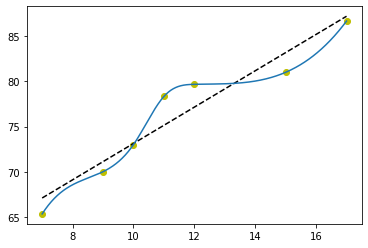

In [669]:
no_crash_df = pd.read_csv('FWT_Data.csv')
no_crash_df.drop('Unnamed: 10', axis=1, inplace=True)
no_crash_df.drop('Unnamed: 11', axis=1, inplace=True)
no_crash_df = no_crash_df.set_index("skier")
no_crash_df.drop("Wadeck Gorak", inplace=True)
no_crash_df.drop("Leo Slemett", inplace=True)

no_crash_df.drop(no_crash_df[no_crash_df['crashes'] > 0].index, inplace=True) #Remove crashes

no_crash_df['total'] = no_crash_df[list(no_crash_df.columns)].sum(axis=1) - no_crash_df['score']

no_crash_df = no_crash_df.sort_values('score').drop_duplicates('total', keep='last')

x = no_crash_df['total'].to_numpy()
y = no_crash_df['score'].to_numpy()
 
cubic_interploation_model = interp1d(x, y, kind = "cubic")
 
X_= np.linspace(x.min(), x.max(), 500)
Y_ = cubic_interploation_model(X_)

coef = np.polyfit(x,y,1)
poly1d_fn = np.poly1d(coef) 

plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k')

plt.plot(X_, Y_)
plt.show()